**Problem Statement**   
Predictive analysis to predict the likelihood of diabetes in a patient.

In [96]:
#Import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning) 

In [97]:
#Import Dataset
diabetes_dataset = pd.read_csv('data/diabetes.csv')
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [98]:
#clone the dataset

data = diabetes_dataset

**Data cleaning**

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [101]:
data.shape

(768, 9)

In [102]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [103]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
# data["Outcome"] = data["Outcome"].map({0:'No', 1:'Yes'}) #encoding the outcome to show yes and no for 1 and 0 respectively

# data.head()

In [105]:
data['Age'].value_counts().sort_index()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: count, dtype: int64

In [106]:
def AgeCategory(value):
    result = value.apply(lambda x: 
        "Aged O to 24" if 0 <= x <= 24
        else ("Aged 25 to 34") if 25 <= x <= 34
        else ("Aged 35 to 44" if 35 <= x <= 44
        else ("Aged 45 to 64") if 45 <= x <= 64
        else ("Aged 65 to 84" if 65 <= x <= 84
        else ("Aged 85 to 100") if 85 <= x <= 100 else np.nan)))
    return result

# Apply the AgeCategory function to the 'Age' column and create a new column 'Age_category'
data['Age_category'] = AgeCategory(data['Age'])

data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,1,Aged 45 to 64
1,1,85,66,29,0,26.6,0.351,31,0,Aged 25 to 34


**Exploratory data analysis (EDA)**

Patients demograph

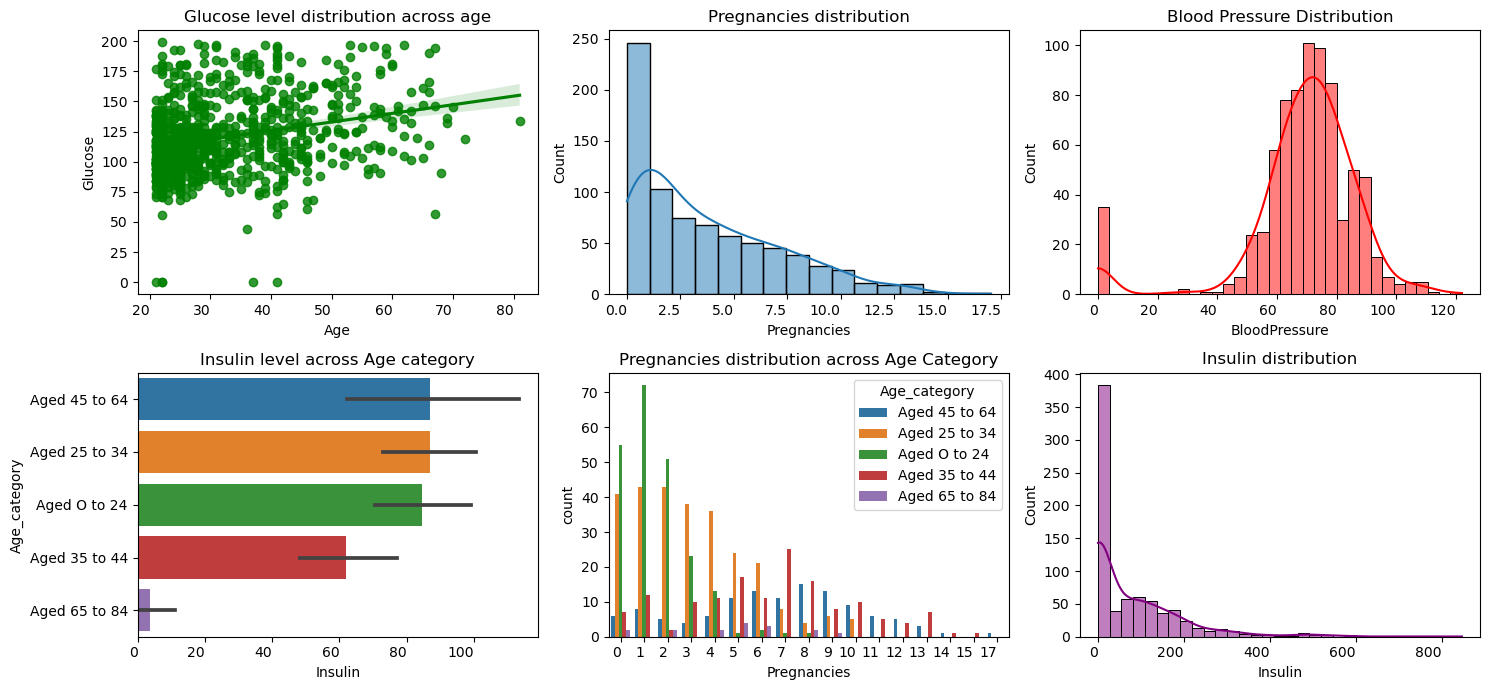

In [107]:
fig, ax = plt.subplots(2,3, figsize=(15,7))

sns.regplot(x='Age', y='Glucose', data=data, color='Green', ax=ax[0,0]).set_title('Glucose level distribution across age')
sns.histplot(x='Pregnancies', kde=True, data=data, ax=ax[0,1]).set_title('Pregnancies distribution')
sns.histplot(x='BloodPressure', kde=True, data=data, color='Red', ax=ax[0,2]).set_title('Blood Pressure Distribution')
sns.barplot(x='Insulin', y='Age_category', data=data, ax=ax[1,0]).set_title('Insulin level across Age category')
sns.countplot(x='Pregnancies', hue='Age_category', data=data, ax=ax[1,1]).set_title("Pregnancies distribution across Age Category")
sns.histplot(x='Insulin', kde=True, data=data, color='Purple',ax=ax[1,2]).set_title('Insulin distribution')

for axes_row in ax:
        for axes in axes_row:
                if axes is not None:
                        axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha='right')
                        axes.set_title(axes.get_title(), fontsize=12)
        
plt.tight_layout()
plt.show()

**Boxplot of numerical columns in the diabetes dataset**

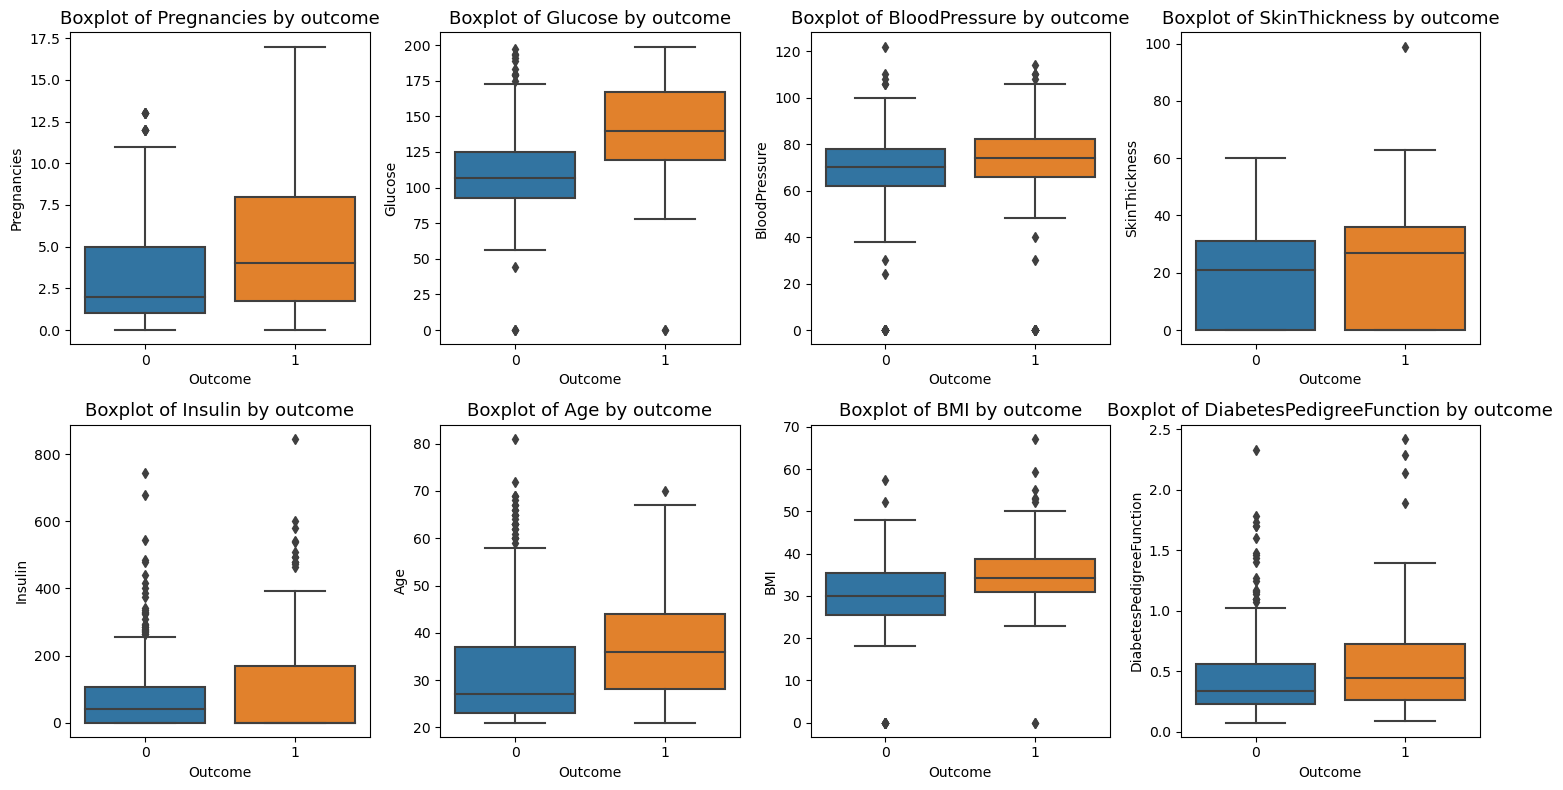

In [108]:
num_var = []

num_var =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','BMI',"DiabetesPedigreeFunction"]

fig, axs=plt.subplots(2,4,figsize=(15,8))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(y=var, x='Outcome', data=data, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var} by outcome", fontsize=13)
fig.tight_layout()


plt.show()

**Handling Outliers**

In [109]:
from scipy import stats

z_scores = stats.zscore(data[num_var])

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

data = data[~outliers]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               729 non-null    int64  
 1   Glucose                   729 non-null    int64  
 2   BloodPressure             729 non-null    int64  
 3   SkinThickness             729 non-null    int64  
 4   Insulin                   729 non-null    int64  
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  729 non-null    float64
 7   Age                       729 non-null    int64  
 8   Outcome                   729 non-null    int64  
 9   Age_category              729 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 62.6+ KB


**statistical description of the dataset**

In [110]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.831276,119.331962,68.975309,19.925926,68.460905,31.830453,0.450209,32.908093,0.337449
std,3.294235,31.371613,19.438673,15.618828,89.094492,7.514788,0.282474,11.293709,0.473164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.243000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,15.000000,32.000000,0.364000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.300000,0.601000,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [111]:
#checking for missing values

check_missing = data.isnull().sum() * 100/data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Series([], dtype: float64)

**Correlation plot**

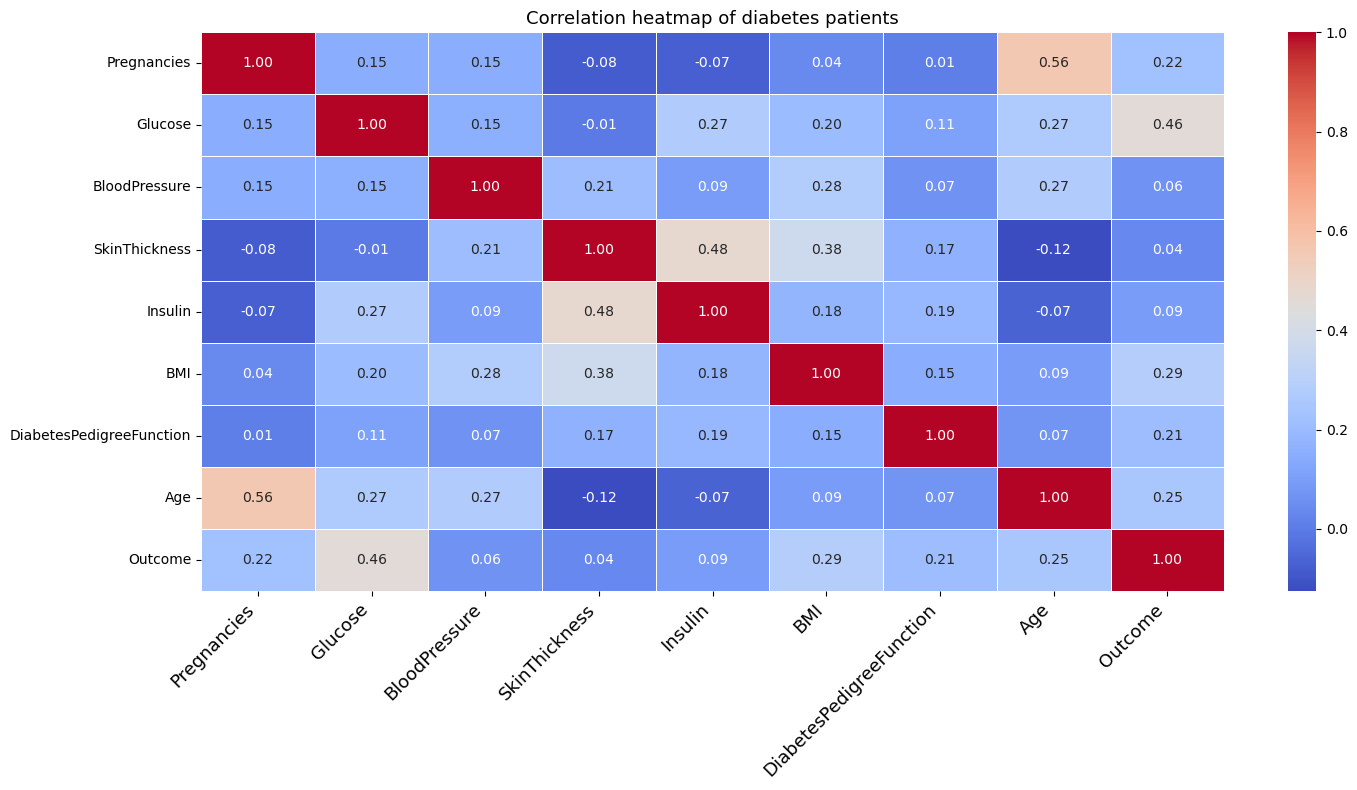

In [112]:
num_var = data.select_dtypes(include='number')

plt.figure(figsize=(15,8))
sns.heatmap(num_var.corr(), linewidths=0.5 ,annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap of diabetes patients', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=13)

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Label Encode category variables

In [114]:


for col in data.select_dtypes(include='object').columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col] = label_encoder.transform(data[col])
    
    print(f"{col}: {data[col].unique()}")


Age_category: [2 0 4 1 3]


C:\Users\admin\AppData\Local\Temp\ipykernel_2004\3321568266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.transform(data[col])


Standard Scaler

In [115]:
scaler = StandardScaler()
scaler.fit(data)

data[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,4
5,5,116,74,0,0,25.6,0.201,30,0,0


Train Test split

In [116]:
X = data.drop(columns=['SkinThickness','Age_category'], axis=1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print('Testing set:', X_test.shape, y_test.shape)
print('Training set:', X_train.shape, y_train.shape)

Testing set: (146, 8) (146,)
Training set: (583, 8) (583,)


In [117]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 583 entries, 262 to 108
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
583 non-null    int64
dtypes: int64(1)
memory usage: 9.1 KB


**Model Selection**
For predicting the diabetes outcome of patients. I'll be using the following Machine Learning algorithm.

`1` Logistic Regression\
`2` XGBoost Classifier

**- Model**

In [118]:

log_model = LogisticRegression()

params_grid = { 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'max_iter': [100, 10000],  
    'class_weight': ['balanced'], 
}
grid_search = GridSearchCV(log_model, params_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

print('Best parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

best_log_params = grid_search.best_params_


Best parameter: {'class_weight': 'balanced', 'max_iter': 100, 'solver': 'newton-cg'}
Best Score: 1.0


In [119]:
log_model = LogisticRegression(**best_log_params)

log_model.fit(X_train, y_train)

log_model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [120]:
log_pred = log_model.predict(X_test)

log_pred[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [121]:
log_proba = log_model.predict_proba(X_test)
log_proba[0:5]

array([[0.9823999 , 0.0176001 ],
       [0.98591403, 0.01408597],
       [0.0116213 , 0.9883787 ],
       [0.00941917, 0.99058083],
       [0.98408376, 0.01591624]])

**XGBoost Model**

In [122]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0,0.1,0.2],
    'min_child_weight':[1,2,3]
}

bayes_search = BayesSearchCV(xgb_model, param_grid, cv=5, error_score='raise')
bayes_search.fit(X_train, y_train)

print('Best Hyperparameter:',bayes_search.best_params_)
print('Best Score(Accuracy);', bayes_search.best_score_)

best_xgb_params = bayes_search.best_params_

Best Hyperparameter: OrderedDict([('colsample_bytree', 0.9), ('gamma', 0.2), ('learning_rate', 0.01), ('max_depth', 5), ('min_child_weight', 2), ('n_estimators', 200), ('subsample', 0.9)])
Best Score(Accuracy); 1.0


In [123]:
xgb_model = XGBClassifier(**best_xgb_params)

xgb_model.fit(X_train, y_train)

xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [124]:
xgb_pred = xgb_model.predict(X_test)

xgb_pred[0:5]

array([0, 0, 1, 1, 0])

**Model Evaluation**

In [129]:
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(1, len(y_preds), figsize=(18,7))
    
    for i, (pred, model_name) in enumerate(zip(y_preds, model_names)):
        
        cm = confusion_matrix(y_true, pred, normalize=None)
        ax = axes[i]
        sns.heatmap(cm, annot=True, ax=ax, fmt='d' ,cmap='viridis', cbar=False)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.xaxis.set_ticklabels(['False Positive', 'True Negative'])
        ax.yaxis.set_ticklabels(['True Positive ', 'False Negative'])
    
    plt.tight_layout()    
    plt.show()


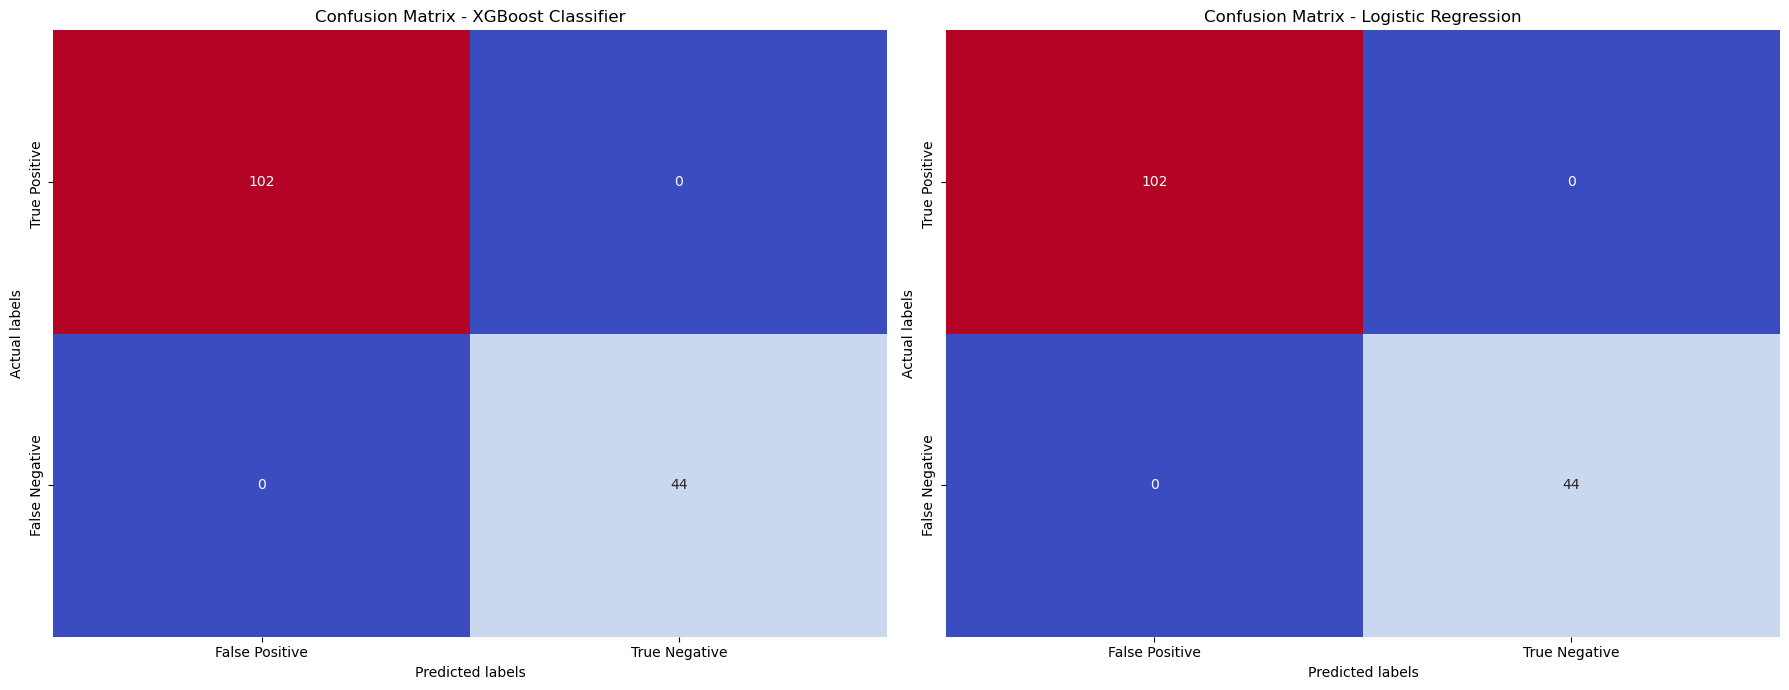

In [130]:
y_true = y_test
y_preds= [xgb_pred, log_pred ]
model_names = ['XGBoost Classifier','Logistic Regression']
plot_confusion_matrix(y_true, y_preds, model_names)

- True Positive (TP): The model correctly predicts positive instances as positive.
- False Positive (FP): The model incorrectly predicts negative instances as positive.
- False Negative (FN): The model incorrectly predicts positive instances as negative.
- True Negative (TN): The model correctly predicts negative instances as negative.

The confusion matrix heatmap visualizes the true positive and true negative value counts in the 2 machine learning models.
`The Logistic Regression` has  `0` false positive and negative values, and `146` true positive and True negative.\
`The XGBoost classifier` has `0` false positive and negative values, and `146` true positive and True negative.\


overall, the `XGBoost classifier` and `Logistic Regression` have great accuracies 

**Features distribution**

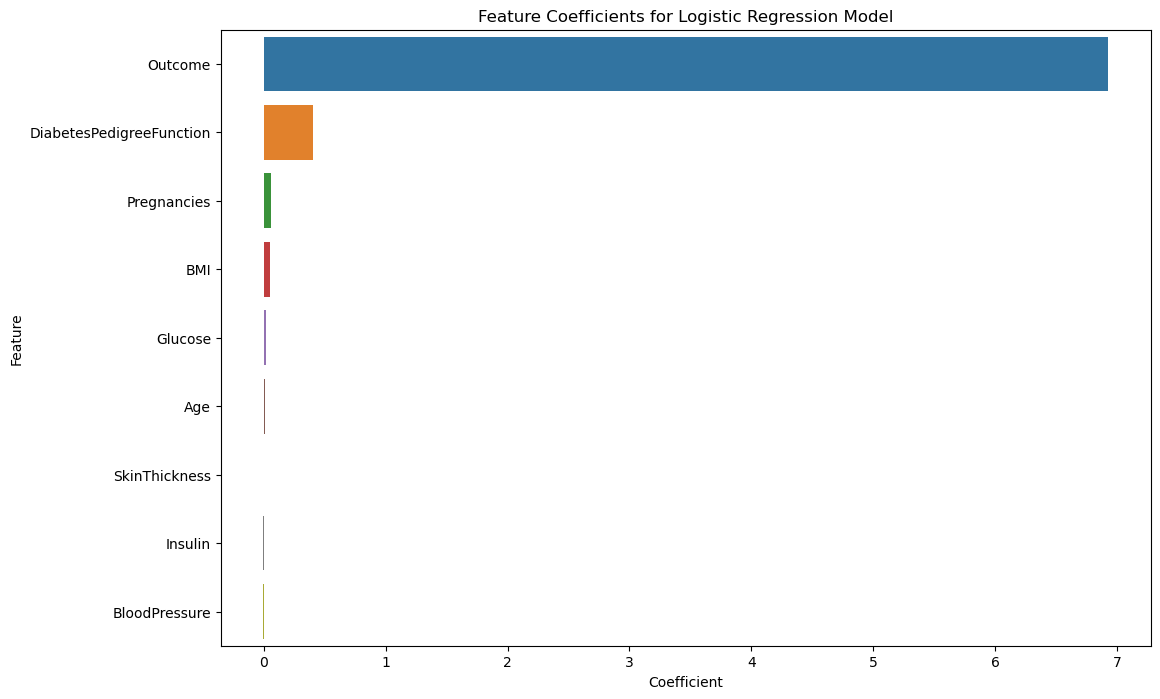

In [84]:
coefficients = log_model.coef_[0]
feature_names = X_train.columns

feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients)
plt.title('Feature Coefficients for Logistic Regression Model')
plt.show()

**Performance Report**

In [132]:
r2_score_xgb = r2_score(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)


r2_score_log = r2_score(y_test, log_pred)
mse_log = mean_squared_error(y_test, log_pred)
mae_log = mean_absolute_error(y_test, log_pred)


list_r2_score = [r2_score_log, r2_score_xgb,]
list_mse = [mse_log, mse_xgb,]
list_mae = [mae_log, mae_xgb,]


Report = pd.DataFrame(list_r2_score, index=['Logistic Regression','XGBoost Classifier'])
Report.columns =['R2 Score']
Report.insert(loc=1,column='Mean Squared Error',value=list_mse)
Report.insert(loc=2, column='Mean Absolute Error', value=list_mae)

Report.columns.name = 'Algorithm'
print(Report)

Algorithm            R2 Score  Mean Squared Error  Mean Absolute Error
Logistic Regression       1.0                 0.0                  0.0
XGBoost Classifier        1.0                 0.0                  0.0


**Classification Report**

In [133]:
print(f"XGBoostClassifier \n\n{classification_report(y_test, xgb_pred)}")
print(f"Logistic Regression \n\n{classification_report(y_test, log_pred)}")


XGBoostClassifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        44

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Logistic Regression 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        44

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



**Conclusion**

Based on the metrics, visualizations, and analysis provided, the `XGBoost classifier` and `Logistic Regression` both emerged as the preferred machine learning model for predicting patient diabetes status. This conclusion is drawn from its higher accuracy of `100%`, for both the `XGBoost classifier` and `Logistic Regression`.

**Making a Predictive System**

In [32]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [33]:
#for saving the model
import pickle

In [34]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [35]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
